In [105]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from intESN import intESN

In [6]:
# dataset

domain = np.arange(1024)

sine = np.sin(0.1 * domain)
square = signal.square(0.1 * domain)

X_train = np.zeros([2, domain.size, 1])
X_train[0] = sine.reshape([domain.size, 1])
X_train[1] = square.reshape([domain.size, 1])

y_train = np.arange(2)

print(y_train)

[0 1]


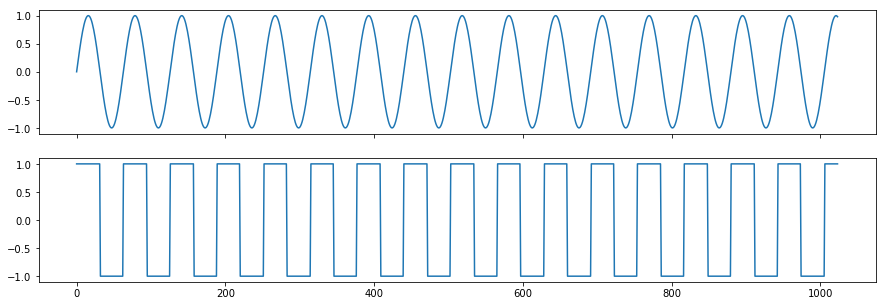

In [7]:
# plot data

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5), sharex=True)
ax1.plot(domain, sine)
ax2.plot(domain, square)

plt.show()

In [66]:
# setup

# dimensnions
# K: inputs , N: neurons, L: outputs
K = 1
N = 100
L = 2

# quantization
sensitivity = 200
levels = np.linspace(-1.2, 1.2, sensitivity)
ref_vectors = np.array([np.random.choice([-1.0, 0.0, 1.0], size=N) for i in range(2)])

def quantize(value):
    level = np.digitize(value, levels)
    section = int(level / float(sensitivity) * N)
    return np.append(ref_vectors[0][:section], ref_vectors[1][section:])

model = intESN(N, K, L, quantize, clip=3)

In [78]:
# train

model.fit(X_train, y_train, task='classification', n_classes=2)

0.707106781187


In [125]:
# test
sig = np.cos(0.1 * domain + 20)
pred = model.predict(sig, np.array([0]), reset=True)

0.884854031904


In [126]:
# display results

print(pred)

[[ 1.12005123 -0.55804889]]


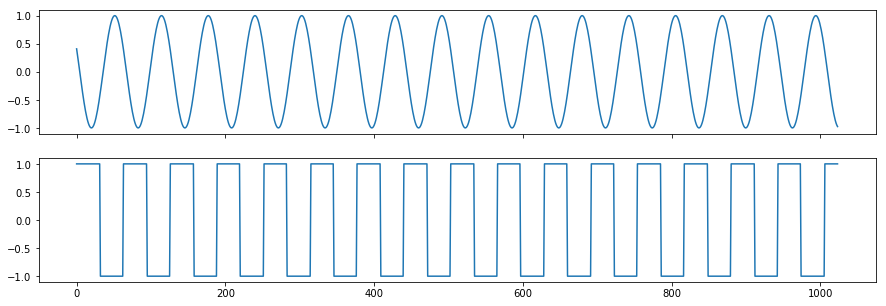

In [127]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5), sharex=True)
ax1.plot(domain, sig)
ax2.plot(domain, square)

plt.show()